### Connect to Drive

In [ ]:
!ls /datasets/drivefaisal/DigiLabs

32cc599b59c069eb_20220411173135.csv  44adac04c93fcbbf_20210705193105.csv
32cc599b59c069eb_20220416081706.csv  44adac04c93fcbbf_20210707182144.csv
32cc599b59c069eb_20220416082624.csv  44adac04c93fcbbf_20210708170606.csv
32cc599b59c069eb_20220416083557.csv  44adac04c93fcbbf_20210719202500.csv
32cc599b59c069eb_20220426073830.csv  44adac04c93fcbbf_20210719211255.csv
32cc599b59c069eb_20220426075728.csv  44adac04c93fcbbf_20210719212545.csv
32cc599b59c069eb_20220427074349.csv  44adac04c93fcbbf_20210803181613.csv
32cc599b59c069eb_20220502075619.csv  44adac04c93fcbbf_20210803183823.csv
44adac04c93fcbbf_20210623111835.csv  bd9e0ef942be38cb_20220331171027.csv
44adac04c93fcbbf_20210627153401.csv  bd9e0ef942be38cb_20220331172416.csv
44adac04c93fcbbf_20210627162118.csv  bd9e0ef942be38cb_20220331174132.csv
44adac04c93fcbbf_20210627174115.csv  bd9e0ef942be38cb_20220408154019.csv
44adac04c93fcbbf_20210704190138.csv  bd9e0ef942be38cb_20220421162100.csv
44adac04c93fcbbf_20210704192425.csv  bd9e0ef942be38

In [ ]:
main = '/datasets/drivefaisal/DigiLabs'

### Read Dataset

In [ ]:
import pandas
import json

In [ ]:
data_frame = pandas.read_csv(
    main + '/32cc599b59c069eb_20220411173135.csv',
    parse_dates=[
        'Timestamp',
    ],
    infer_datetime_format=True,
    na_values=['']
)

In [ ]:
data_frame.head(5)

,Timestamp,Latitude,Longitude,Horizontal Accuracy,Elevation Change
0,2022-04-11 17:31:35.791,1.383498,103.840622,46.917000,0.000000
1,2022-04-11 17:31:36.718,1.383556,103.840637,36.271999,0.184959
2,2022-04-11 17:31:37.708,1.383559,103.840638,31.447001,0.195526
3,2022-04-11 17:31:38.569,1.383555,103.840638,29.544001,-0.200813
4,2022-04-11 17:31:39.213,1.383550,103.840637,27.002001,-0.023781


In [ ]:
print(data_frame.dtypes)

Timestamp              datetime64[ns]
Latitude                      float64
Longitude                     float64
Horizontal Accuracy           float64
Elevation Change              float64
dtype: object


### Convert to Geojson (Maybe Unnecessary)

In [ ]:
json_result_string = data_frame.to_json(
    orient='records', 
    double_precision=12,
    date_format='iso'
)
json_result = json.loads(json_result_string)

In [ ]:
geojson = {
    'type': 'FeatureCollection',
    'features': []
}
for record in json_result:
    geojson['features'].append({
        'type': 'Feature',
        'geometry': {
            'type': 'Point',
            'coordinates': [record['Latitude'], record['Longitude']],
        },
        'properties': {
            'time': record['Timestamp'], 
            'hAccuracy': record['Horizontal Accuracy'], 
            'elChange':record['Elevation Change']}
    })

#print(json.dumps(geojson, indent=1))

### Visualize on Map

In [ ]:
import geopandas
import folium
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, shape

In [ ]:
geometry = geopandas.points_from_xy(data_frame.Longitude, data_frame.Latitude)
geo_df = geopandas.GeoDataFrame(data_frame[['Timestamp','Latitude', 'Longitude', 'Horizontal Accuracy', 'Elevation Change']], geometry=geometry)

geo_df.head()

,Timestamp,Latitude,Longitude,Horizontal Accuracy,Elevation Change,geometry
0,2022-04-11 17:31:35.791,1.383498,103.840622,46.917000,0.000000,POINT (103.84062 1.38350)
1,2022-04-11 17:31:36.718,1.383556,103.840637,36.271999,0.184959,POINT (103.84064 1.38356)
2,2022-04-11 17:31:37.708,1.383559,103.840638,31.447001,0.195526,POINT (103.84064 1.38356)
3,2022-04-11 17:31:38.569,1.383555,103.840638,29.544001,-0.200813,POINT (103.84064 1.38355)
4,2022-04-11 17:31:39.213,1.383550,103.840637,27.002001,-0.023781,POINT (103.84064 1.38355)


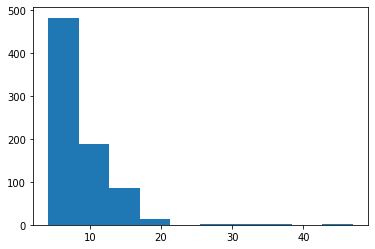

In [ ]:
plt.hist(geo_df['Horizontal Accuracy'])
plt.show() 

Marker Visualization

In [ ]:
map1 = folium.Map(location = [1.3820,103.8418], tiles='OpenStreetMap', zoom_start = 17)

In [ ]:
# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry ]

# Iterate through list and add a marker for each volcano, color-coded by its type.
i = 0
for coordinates in geo_df_list:
    #assign a color marker for the type of volcano, Strato being the most common
    if geo_df['Horizontal Accuracy'][i] < 3:
        type_color = "green"
    elif geo_df['Horizontal Accuracy'][i] < 5:
        type_color = "blue"
    elif geo_df['Horizontal Accuracy'][i] < 10:
        type_color = "orange"
    elif geo_df['Horizontal Accuracy'][i] < 20:
        type_color = "pink"
    else:
        type_color = "purple"


    # Place the markers with the popup labels and data
    map1.add_child(folium.Marker(location = coordinates,
                            popup =
                            "Timestamp: " + str(geo_df['Timestamp'][i]) + '<br>' +
                            "Horizontal Accuracy: " + str(geo_df['Horizontal Accuracy'][i]) + '<br>' +
                            "Elevation Change: " + str(geo_df['Elevation Change'][i]) + '<br>'
                            "Coordinates: " + str(geo_df_list[i]),
                            icon = folium.Icon(color = "%s" % type_color)))
    i = i + 1

In [ ]:
map1

Heatmap Visualization

In [ ]:
from folium import plugins

map2 = folium.Map(location = [1.3820,103.8418], tiles='OpenStreetMap', zoom_start = 17)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry ]

heat_data
plugins.HeatMap(heat_data).add_to(map2)

map2

Line Visualization from Point

In [ ]:
print(geo_df_list)

[[1.3834975, 103.8406222], [1.3835559, 103.840637], [1.3835592, 103.8406383], [1.3835548, 103.8406381], [1.3835498, 103.8406375], [1.3835473, 103.8406371], [1.3835422, 103.8406349], [1.3835355, 103.8406308], [1.3835268, 103.8406262], [1.3835176, 103.8406184], [1.3835101, 103.8406084], [1.3835009, 103.8405928], [1.3834939, 103.8405774], [1.3834903, 103.8405626], [1.3834841, 103.8405457], [1.3834765, 103.8405286], [1.3834733, 103.8405205], [1.3834708, 103.8405153], [1.3834676, 103.8405081], [1.3834642, 103.8405014], [1.3834568, 103.8404917], [1.3834505, 103.8404855], [1.3834416, 103.8404754], [1.3834362, 103.8404679], [1.3834303, 103.8404591], [1.383424, 103.8404484], [1.3834217, 103.8404438], [1.383419, 103.8404393], [1.3834151, 103.8404328], [1.383412, 103.840428], [1.3834037, 103.8404143], [1.3833995, 103.8404077], [1.3833946, 103.8403998], [1.3833906, 103.8403926], [1.3833821, 103.8403847], [1.3833738, 103.8403764], [1.3833674, 103.8403695], [1.3833588, 103.8403579], [1.383351, 103.8

In [ ]:
map3 = folium.Map(location = [1.3820,103.8418], tiles='OpenStreetMap', zoom_start = 17)

my_PolyLine=folium.PolyLine(locations=geo_df_list,weight=5)
map3.add_child(my_PolyLine)

map3

Calculate Average Speed

In [ ]:
lineStringObj = LineString( [[a.x, a.y] for a in geo_df.geometry.values] )
line_df = pandas.DataFrame()
line_gdf = geopandas.GeoDataFrame(geometry=[lineStringObj,])

In [ ]:
lineStringObj.length

0.007381497611377411

In [ ]:
line_gdf.length

0    0.007381
dtype: float64

In [ ]:
#Project Line to CRS
from pyproj import Proj, Transformer
import shapely.ops as sp_ops
geom =  lineStringObj
my_transformer = Transformer.from_crs('EPSG:4326', 'EPSG:3857', always_xy=True)
geom_transformed = sp_ops.transform(my_transformer.transform, geom)

In [ ]:
#meter? has to be checked again
geom_transformed.length

821.8177515923576

In [ ]:
print(geo_df['Timestamp'].values[0])

2022-04-11T17:31:35.791000000


In [ ]:
date1 = pandas.to_datetime(geo_df['Timestamp'].values[0], format='%Y-%m-%dT%H:%M:%S.%fZ')
date2 = pandas.to_datetime(geo_df['Timestamp'].values[-1], format='%Y-%m-%dT%H:%M:%S.%fZ')

time_dif = (date2 - date1)
print(time_dif.total_seconds() / 60, ' minutes')

10.320133333333333  minutes


In [ ]:
speed = geom_transformed.length*60/time_dif.total_seconds()
print(speed, 'meter per minute')

79.6324742179388 meter per minute


In [ ]:
print(line_gdf)

                                            geometry
0  LINESTRING (103.84062 1.38350, 103.84064 1.383...


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ac556f45-8e4a-4fcc-9219-6f3d3e98a534' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>